In [1]:
import os
import numpy as np
from skimage import io
from particle.utils.plotter import makeGrid

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
                                    
zhfont = mpl.font_manager.FontProperties(fname='/opt/miniconda3/envs/PyTorch/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/simsun.ttf')

sns.set(font_scale=1.3)
sns.set_style({"font.family": "Monospace"})

size = 24
labelsize = 24

In [2]:
def comparator(name:str):
    part1, part2 = name.split('-')
    name = f"{int(part1):02d}-{part2}"
    return name

In [17]:
# 隐变量维数
path = "/home/chuan/soil/output/dcgan/iterD:iterG=1:1/nLatent8/process"
# path = "/home/chuan/soil/output/dcgan/iterD:iterG=1:1/nLatent16/process"
# path = "/home/chuan/soil/output/dcgan/iterD:iterG=1:1/nLatent32/process"
processFileName = "process-2.png"

In [18]:
imgFiles = os.listdir(path)
imgFiles.sort(key=comparator)
imgFiles

['1-1.png',
 '1-2.png',
 '1-3.png',
 '1-4.png',
 '1-5.png',
 '2-1.png',
 '2-2.png',
 '2-3.png',
 '2-4.png',
 '2-5.png',
 '3-1.png',
 '3-2.png',
 '3-3.png',
 '3-4.png',
 '3-5.png',
 '4-1.png',
 '4-2.png',
 '4-3.png',
 '4-4.png',
 '4-5.png',
 '5-1.png',
 '5-2.png',
 '5-3.png',
 '5-4.png',
 '5-5.png',
 '6-1.png',
 '6-2.png',
 '6-3.png',
 '6-4.png',
 '6-5.png',
 '7-1.png',
 '7-2.png',
 '7-3.png',
 '7-4.png',
 '7-5.png',
 '8-1.png',
 '8-2.png',
 '8-3.png',
 '8-4.png',
 '8-5.png',
 '9-1.png',
 '9-2.png',
 '9-3.png',
 '9-4.png',
 '9-5.png',
 '10-1.png',
 '10-2.png',
 '10-3.png',
 '10-4.png',
 '10-5.png',
 '11-1.png',
 '11-2.png',
 '11-3.png',
 '11-4.png',
 '11-5.png',
 '12-1.png',
 '12-2.png',
 '12-3.png',
 '12-4.png',
 '12-5.png',
 '13-1.png',
 '13-2.png',
 '13-3.png',
 '13-4.png',
 '13-5.png',
 '14-1.png',
 '14-2.png',
 '14-3.png',
 '14-4.png',
 '14-5.png',
 '15-1.png',
 '15-2.png',
 '15-3.png',
 '15-4.png',
 '15-5.png',
 '16-1.png',
 '16-2.png',
 '16-3.png',
 '16-4.png',
 '16-5.png',
 '17-

In [19]:
sample = io.imread(os.path.join(path, imgFiles[0]))
sample.shape

(350, 400, 3)

In [20]:
imgs = np.empty((len(imgFiles), *sample.shape), dtype=sample.dtype)
for i, imgFile in enumerate(imgFiles):
    imgs[i] = io.imread(os.path.join(path, imgFile))

In [21]:
savePath = os.path.join(path, "..")

In [22]:
# slicer = [[i + j for j in range(5)] for i in range(0, 70, 10)]
slicer = [[i + j for j in range(5)] for i in range(50, 75, 5)]
slicer = sum(slicer, [])
print(slicer)
makeGrid(imgs[slicer], os.path.join(savePath, "process.png"), nrow=5)

[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]


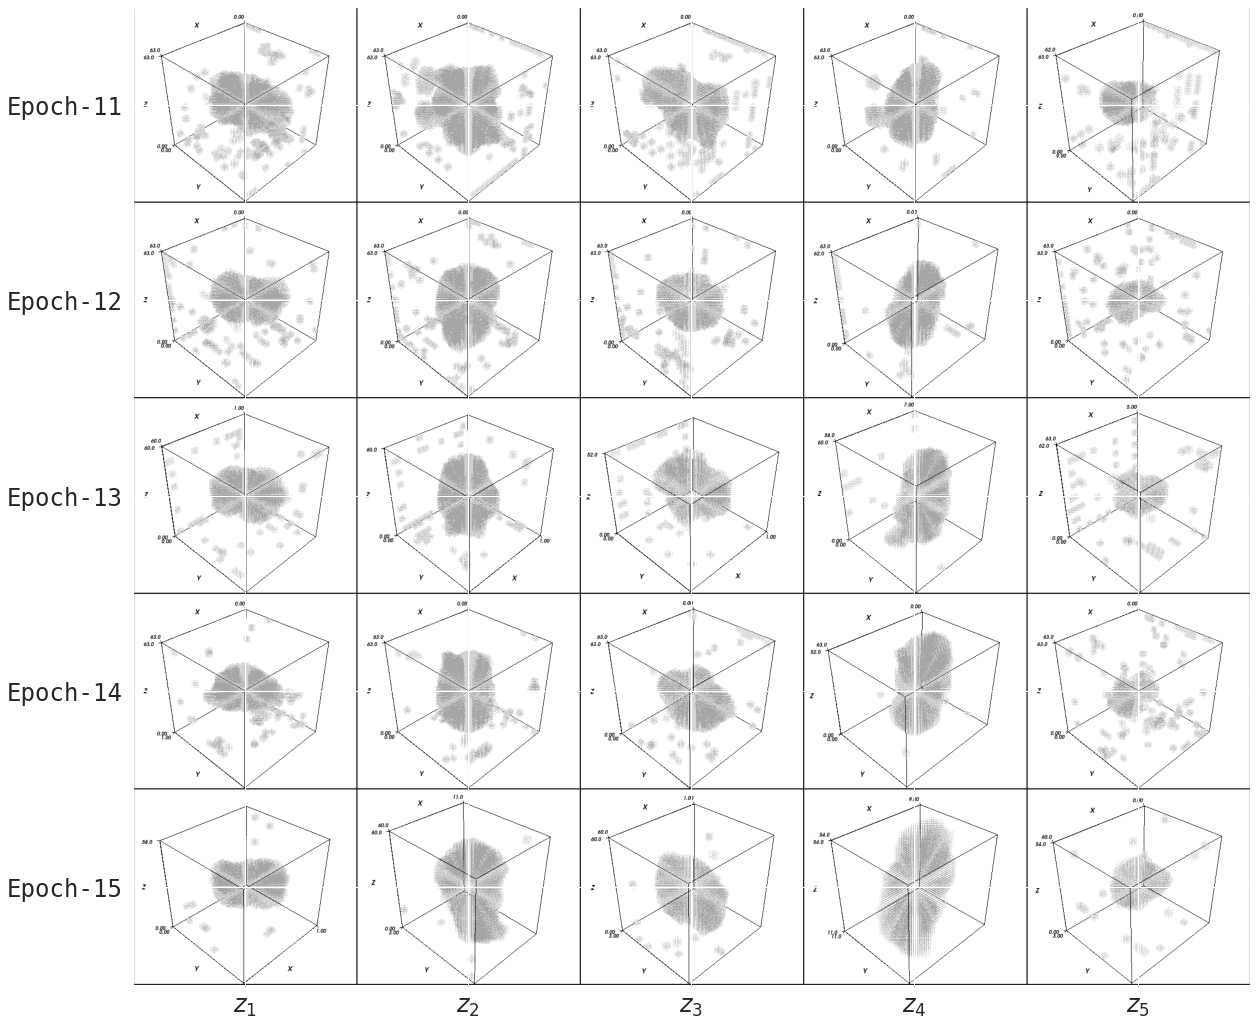

In [23]:
image = io.imread(os.path.join(savePath, "process.png"))
xUnit = image.shape[1] // 10
# yUnit = image.shape[0] // 14
yUnit = image.shape[0] // 10
plt.figure(figsize=(24, 18))
plt.imshow(image)
plt.xticks(range(xUnit, image.shape[1], xUnit*2), [f'$z_{i}$' for i in range(1, 6)])
# plt.yticks(range(yUnit, image.shape[0], yUnit*2), [f'Epoch-{1+2*i}' for i in range(7)])
plt.yticks(range(yUnit, image.shape[0], yUnit*2), [f'Epoch-{11+i}' for i in range(5)])
plt.tick_params(labelsize=labelsize)
plt.savefig(os.path.join(savePath, processFileName), dpi=200)

In [10]:
from particle.utils.log import parseLog
plt.style.use("bmh")
def plotTrainCurveOfGan(category, step=5):
    plt.figure(figsize=(16, 12))
    if category == "probability":
        feature1 = "D(x)"
        feature2 = "D(G(z))"
        logPath = os.path.join(path, "../dcgan.log")
        var1 = parseLog(logPath, feature1)[:1000]
        var2 = parseLog(logPath, feature2)[:1000]
        xRange = range(0, len(var1)*10, step*10)
        plt.plot(xRange, var1[::step], label=f"${feature1}$")
        plt.plot(xRange, var2[::step], label=f"${feature2}$")
        # 坐标轴刻度的大小
        plt.tick_params(labelsize=labelsize)
        # 坐标轴名称的大小
        plt.xlabel('迭代次数', fontproperties=zhfont, size=size)
        plt.ylabel('概率', fontproperties=zhfont, size=size)
        # 设置图例的大小等参数
        plt.legend(fancybox=True, borderpad=1, prop=zhfont, loc="upper right")
        leg = plt.gca().get_legend()
        ltext = leg.get_texts()
        # xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
        plt.setp(ltext, fontsize='xx-large')
        plt.savefig(os.path.join(savePath, "trainCurve-probability.png"), dpi=150)
    elif category == "loss":
        feature1 = "loss_D"
        feature2 = "loss_G"
        logPath = os.path.join(path, "../dcgan.log")
        var1 = parseLog(logPath, feature1)[:1000]
        var2 = parseLog(logPath, feature2)[:1000]
        xRange = range(0, len(var1)*10, step*10)
        plt.plot(xRange, var1[::step], label="$loss_D$")
        plt.plot(xRange, var2[::step], label="$loss_G$")
        # 坐标轴刻度的大小
        plt.tick_params(labelsize=labelsize)
        # 坐标轴名称的大小
        plt.xlabel('迭代次数', fontproperties=zhfont, size=size)
        plt.ylabel('模型损失', fontproperties=zhfont, size=size)
        # 设置图例的大小等参数
        plt.legend(fancybox=True, borderpad=1, prop=zhfont, loc="upper right")
        leg = plt.gca().get_legend()
        ltext = leg.get_texts()
        # xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
        plt.setp(ltext, fontsize='xx-large')
        plt.savefig(os.path.join(savePath, "trainCurve-loss.png"), dpi=150)

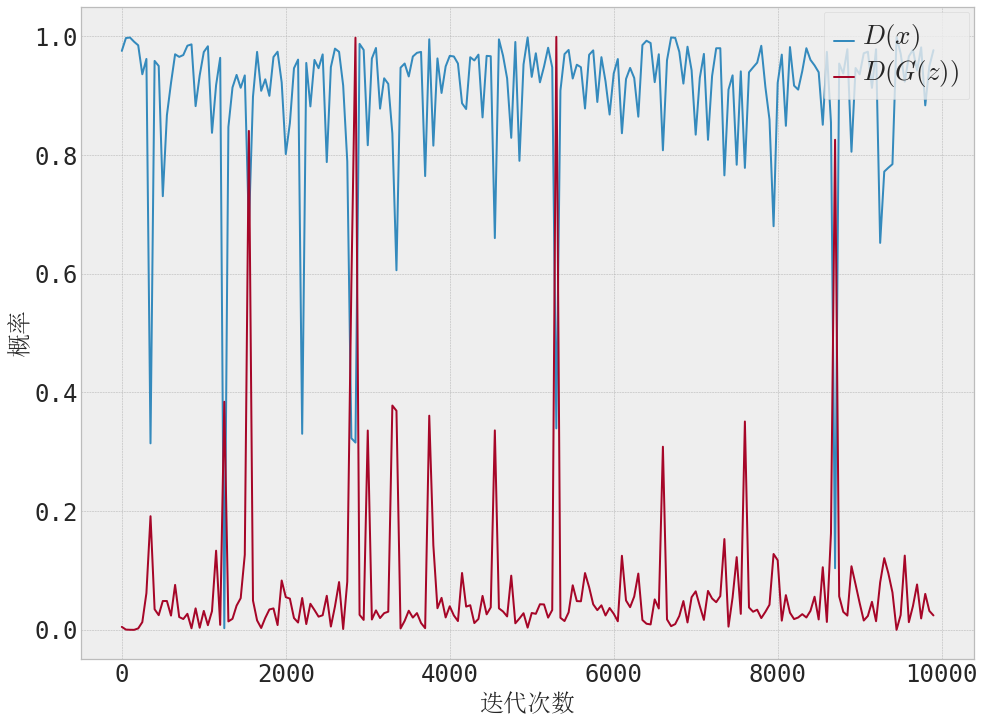

In [11]:
plotTrainCurveOfGan('probability')

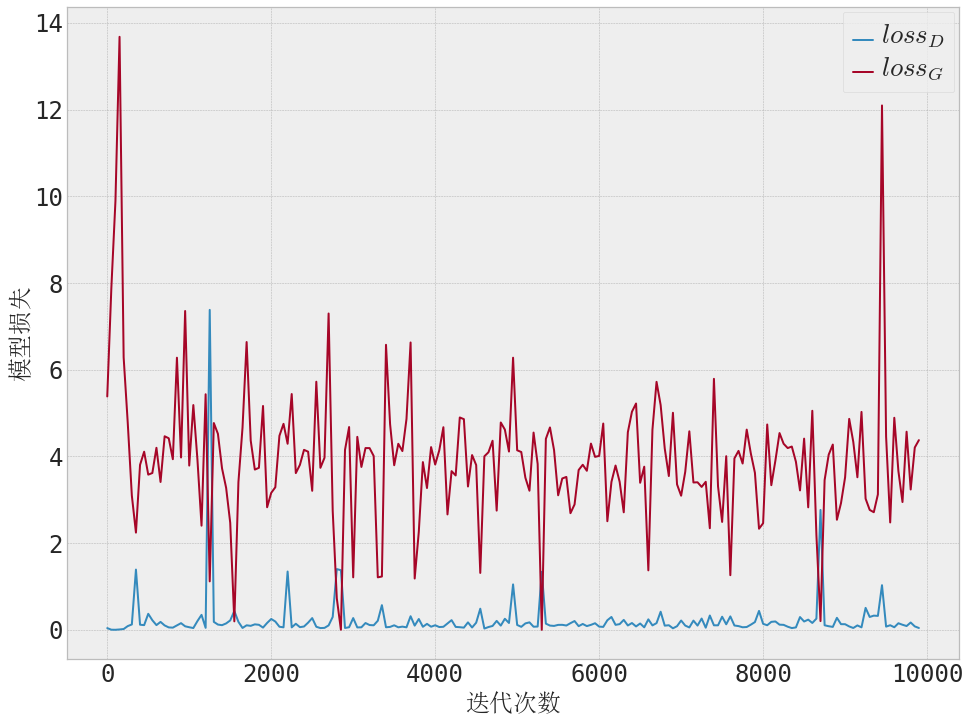

In [12]:
plotTrainCurveOfGan("loss")

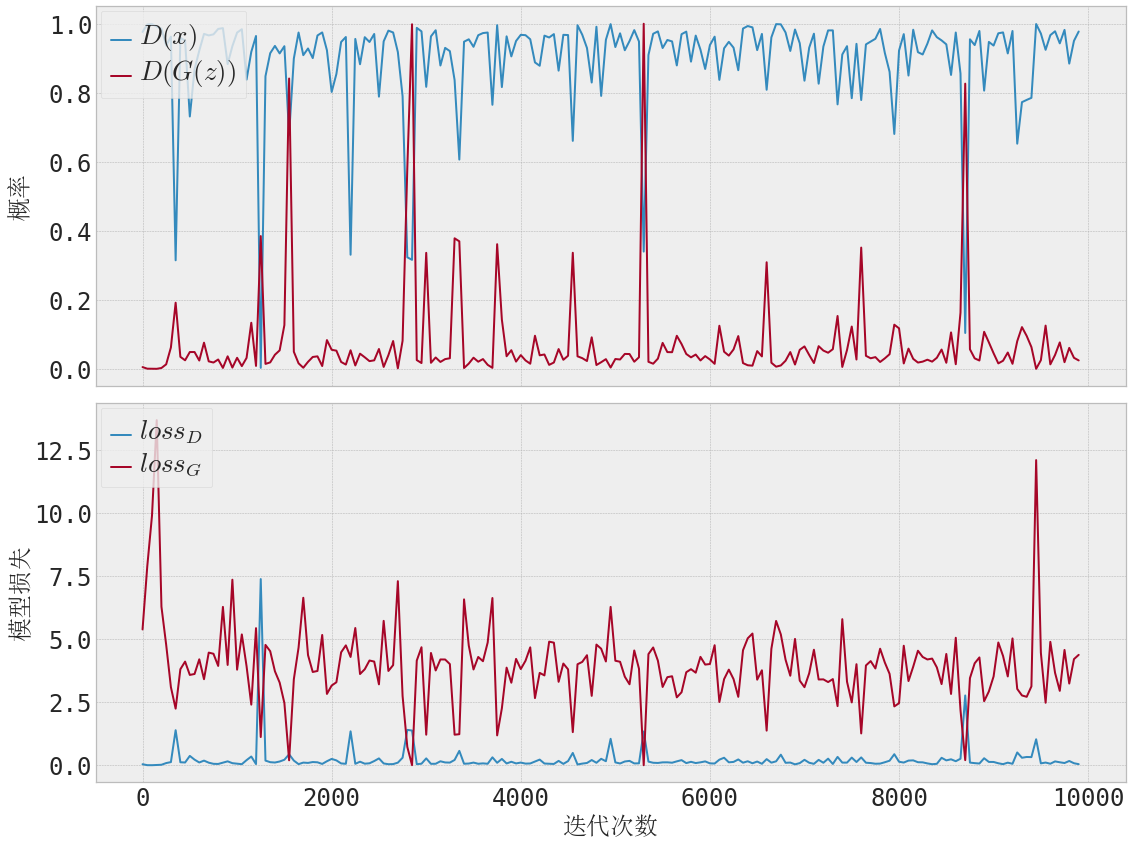

In [13]:
from particle.utils.log import parseLog
plt.style.use("bmh")
def plotTrainCurveOfGan(step=5):
    loc = "upper left"
    fig, ax = plt.subplots(2, 1, figsize=(16, 12), sharex=True, tight_layout=True)
#     plt.subplots_adjust(hspace=0.04)
    # plot probability
    feature1 = "D(x)"
    feature2 = "D(G(z))"
    logPath = os.path.join(path, "../dcgan.log")
    var1 = parseLog(logPath, feature1)[:1000]
    var2 = parseLog(logPath, feature2)[:1000]
    xRange = range(0, len(var1)*10, step*10)
    ax[0].plot(xRange, var1[::step], label=f"${feature1}$")
    ax[0].plot(xRange, var2[::step], label=f"${feature2}$")
    # 坐标轴刻度的大小
    ax[0].tick_params(labelsize=labelsize)
    # 坐标轴名称的大小
    ax[0].set_ylabel('概率', fontproperties=zhfont, size=size)
    # 设置图例的大小等参数
    ax[0].legend(fancybox=True, borderpad=1, prop=zhfont, loc=loc)
    leg = ax[0].get_legend()
    ltext = leg.get_texts()
    # xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    plt.setp(ltext, fontsize='xx-large')
        
    # loss
    feature1 = "loss_D"
    feature2 = "loss_G"
    logPath = os.path.join(path, "../dcgan.log")
    var1 = parseLog(logPath, feature1)[:1000]
    var2 = parseLog(logPath, feature2)[:1000]
    xRange = range(0, len(var1)*10, step*10)
    ax[1].plot(xRange, var1[::step], label="$loss_D$")
    ax[1].plot(xRange, var2[::step], label="$loss_G$")
    # 坐标轴刻度的大小
    ax[1].tick_params(labelsize=labelsize)
    # 坐标轴名称的大小
    ax[1].set_ylabel('模型损失', fontproperties=zhfont, size=size)
    # 设置图例的大小等参数
    ax[1].legend(fancybox=True, borderpad=1, prop=zhfont, loc=loc)
    leg = ax[1].get_legend()
    ltext = leg.get_texts()
    # xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    plt.setp(ltext, fontsize='xx-large')
    
    plt.xlabel('迭代次数', fontproperties=zhfont, size=size)
    fig.align_labels()
    plt.savefig(os.path.join(savePath, "trainCurve.png"), dpi=150)

plotTrainCurveOfGan()

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']